# Scraping Books

In [ ]:
import sys

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

## Defining the Functions

In [ ]:
def fetch_page(page):
    # Informational print
    print(f"Scraping page {page + 1}")
    
    # Create the response using a header for the language
    response = requests.get(
        f'http://books.toscrape.com/catalogue/page-{page + 1}.html',
        headers = {"Accept-Language":"en-US"}
    )
    
    # Create the soup
    soup = BeautifulSoup(response.content, "html.parser")
    
    return soup

In [ ]:
# Create a mapping for the ratings
ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

In [ ]:
def add_books_to_dict(soup, dict):
    for book_html in soup.find_all(class_ = "product_pod"):
        # Find the title and price
        dict['Title'].append(book_html.find("h3").find("a").string)
        dict['Price'].append(float(book_html.find(class_ = "price_color").string.strip('£')))
        
        # Find the star rating and user the mapping to convert it to numbers
        stars_html = book_html.find(class_ = "star-rating")
        dict['Rating'].append(ratings.get(stars_html.attrs['class'][1], 0))

In [ ]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [ ]:
def create_books_df(max_page):
    for page in range(max_page):
        # Get page from the soup and add it to the books_dict
        soup = fetch_page(page)
        add_books_to_dict(soup, books_dict)

    return pd.DataFrame.from_dict(books_dict)

## Creating the `books_df`

In [ ]:
books_df = create_books_df(50)
books_df.shape

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50


(1000, 3)

### Visualizing

In [ ]:
books_df.head()

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5


<AxesSubplot:xlabel='Rating'>

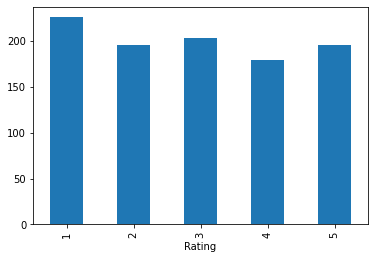

In [ ]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

<AxesSubplot:>

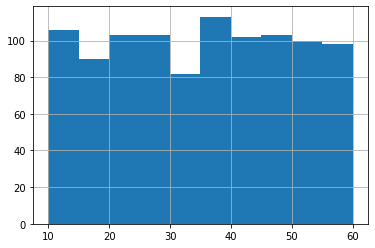

In [ ]:
books_df['Price'].hist()

In [ ]:
books_df.to_csv("books.csv")
#all_books_df.to_excel('books.xlsx', sheet_name='Books')